### Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway


### Importation du Dataset

In [3]:
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Informations générales sur le Dataset

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()/len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.select_dtypes(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [43]:
df.drop('customerID', inplace=True, axis=1)
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'{df[i].value_counts()}')
        print('-'*50)

gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--------------------------------------------------
OnlineBackup
No                     3088
Yes            

### Preprocessing des données

In [44]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
#calcul du taux de churn
churn_rate = df['Churn'].value_counts(normalize=True)*100
print(f'{churn_rate}')

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


## EDA

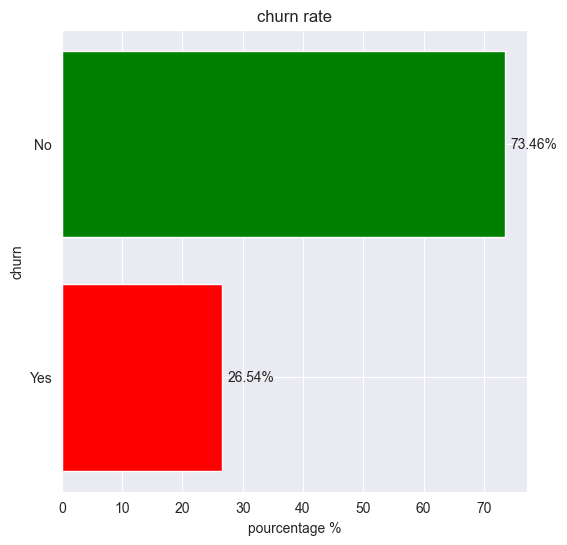

In [6]:
#histogramme horizontal
plt.figure(figsize=(8,8))
bars = plt.barh(churn_rate.index, churn_rate.values, color=['green', 'red'])

plt.xlabel('pourcentage %')
plt.ylabel('churn')
plt.title('churn rate')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.show()

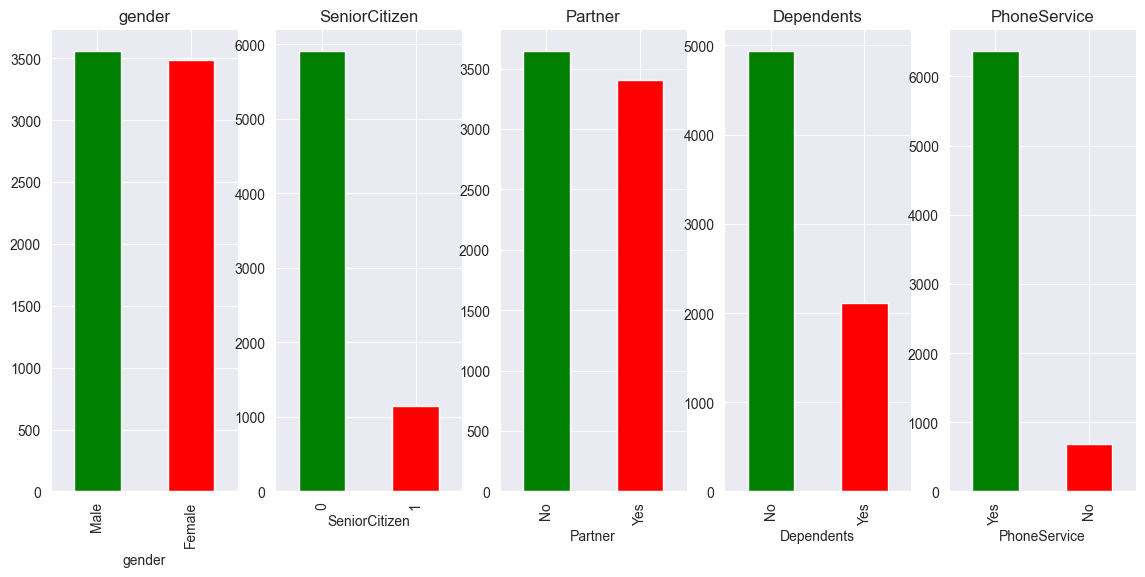

In [14]:
cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService']

plt.figure(figsize=(14,6))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    df[col].value_counts().plot(kind='bar', color=['green', 'red'])
    ax.set_title(f'{col}')


In [15]:
#division des colonnes numériques et catégorielles
num = []
cat = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype((df[col])):
        num.append(col)
    if pd.api.types.is_object_dtype((df[col])):
        cat.append(col)
print(f'colonnes numériques : {num}')
print(f'colonnes catégorielle : {cat}')

colonnes numériques : ['tenure', 'MonthlyCharges', 'TotalCharges']
colonnes catégorielle : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


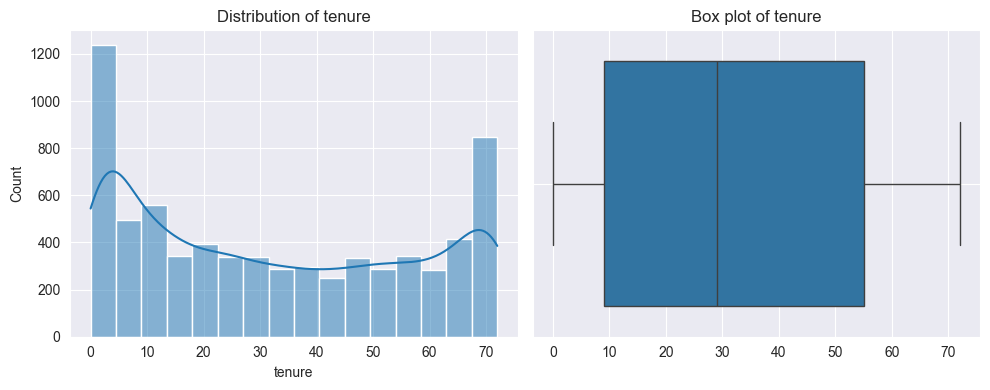

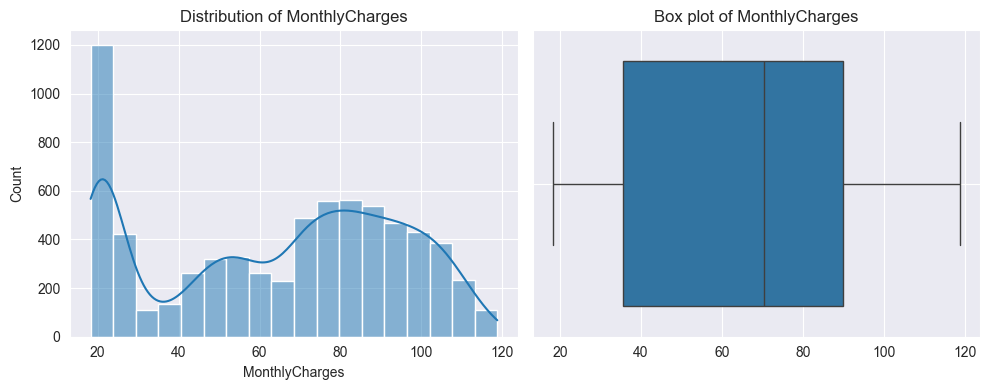

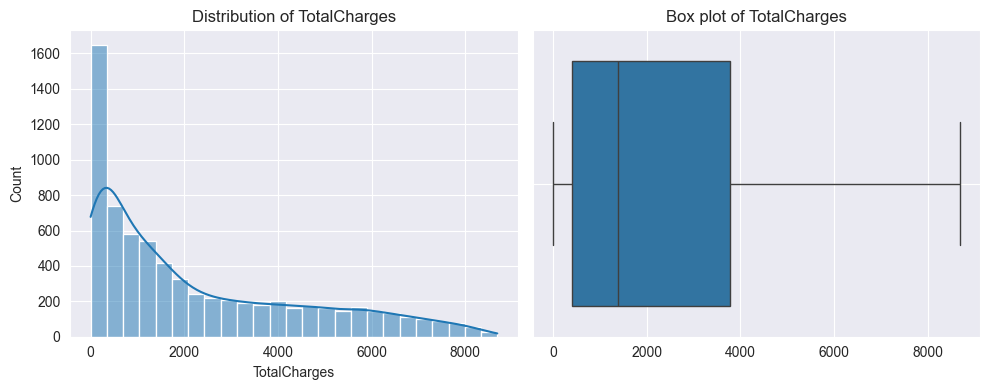

In [16]:
for i in num:
    fig,axes=plt.subplots(1,2,figsize=(10,4))

    sns.histplot(df[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

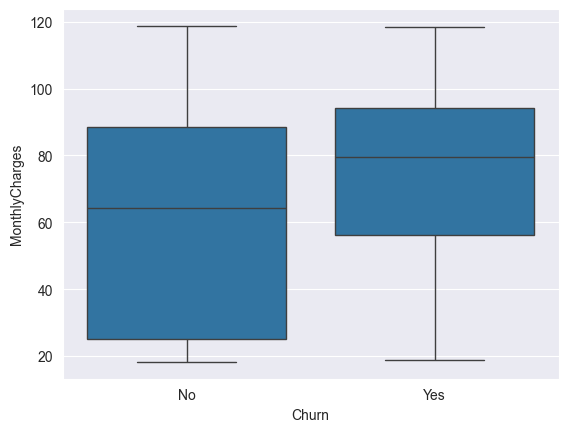

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


#### Hypothèses :
-Les utilisateurs ont tendance à se désabonner s'ils trouvent le cout de l'abonnement mensuel trop elevé

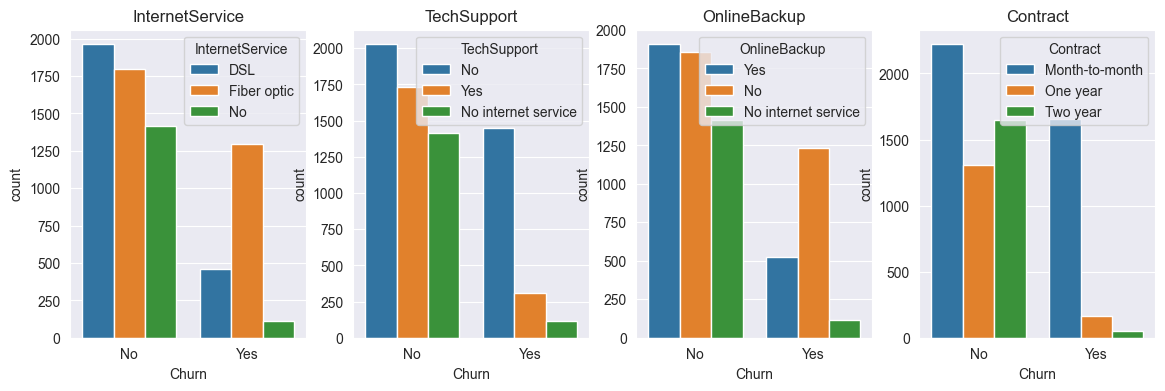

In [19]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

#### hypothèse :
-les personnes qui utilisent la fibre optique se désabonnent plus.
-le techSupport s'avére ne pas etre d'une grande utilité au client.
-les clients qui se désabonnent avaient un contrat mensuel.

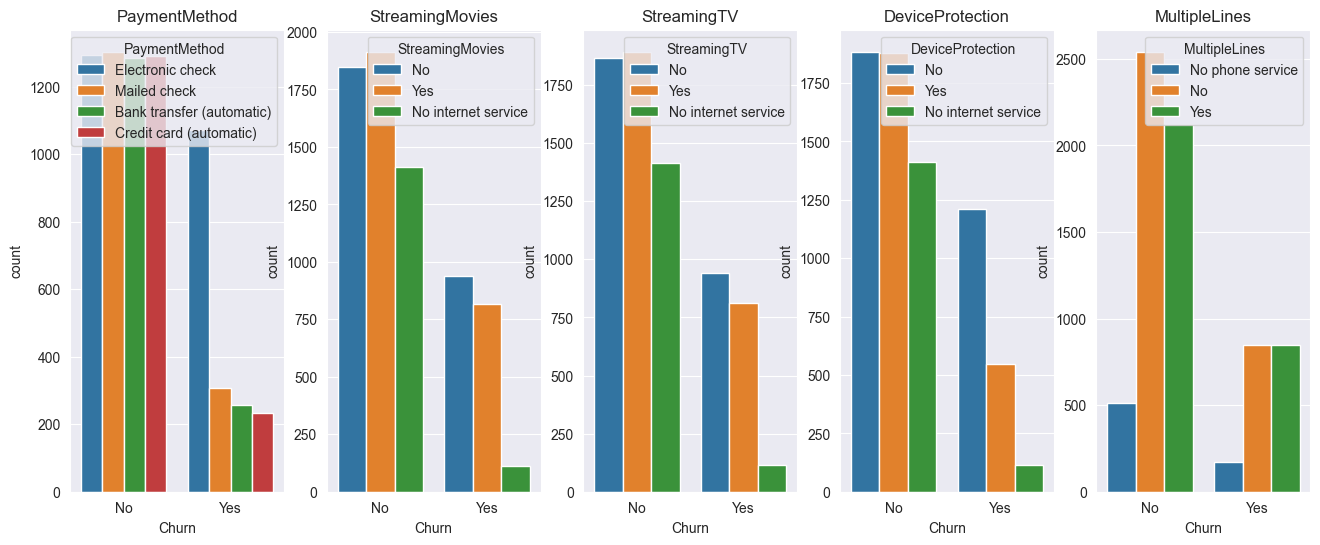

In [23]:
cols = ['PaymentMethod', 'StreamingMovies', 'StreamingTV', 'DeviceProtection', 'MultipleLines']

plt.figure(figsize=(16,6))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x='Churn', hue=str(col), data=df)
    ax.set_title(f'{col}')

#### hypothèse :
-Les clients qui payent avec un chèque électronique se désabonnent le plus.
-Les clients qui ne possédent pas de device protector se désabonnent le plus.

In [24]:
# utilisation du test de chi-2
from scipy.stats import chi2_contingency

variables = df.columns[df.dtypes == 'object']

result = []
for var in variables:
    table = pd.crosstab(df[var], df['Churn'])
    chi2, p_value,_,_ = chi2_contingency(table)
    result.append({'variable':var, 'chi square':chi2, 'p-value':p_value})

res = pd.DataFrame(result)
res

,variable,chi square,p-value
0,gender,0.484083,4.865787e-01
1,SeniorCitizen,159.426300,1.510067e-36
2,Partner,158.733382,2.139911e-36
3,Dependents,189.129249,4.924922e-43
4,PhoneService,0.915033,3.387825e-01
5,MultipleLines,11.330441,3.464383e-03
6,InternetService,732.309590,9.571788e-160
7,OnlineSecurity,849.998968,2.661150e-185
8,OnlineBackup,601.812790,2.079759e-131
9,DeviceProtection,558.419369,5.505219e-122


#### hypothèse:
-SeniorCitizen présente une bonne association avec la variable churn.
-Partner présente une bonne association avec la variable churn.
-Dependents présente une bonne association avec la variable churn.
-MultipleLines, PaymentMethod, PaperlessBilling, Contract présente une bonne association avec la variable churn.

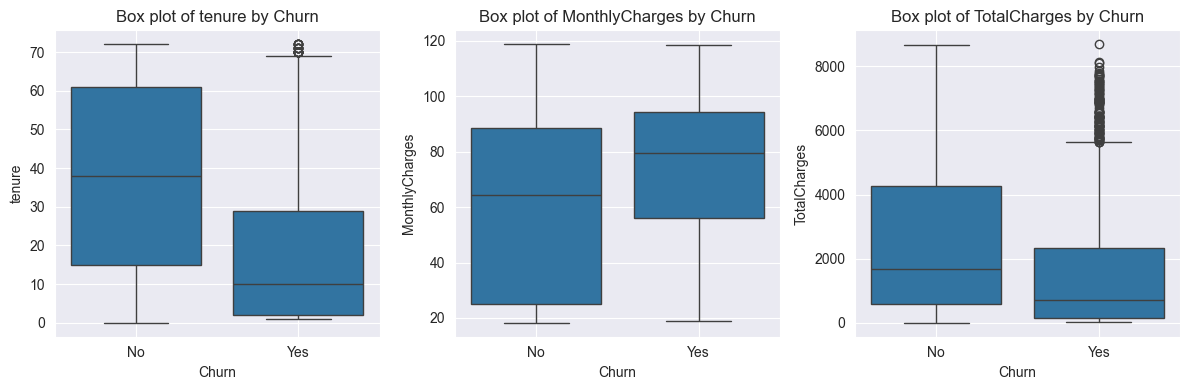

In [26]:
churn_column='Churn'
fig,axes=plt.subplots(1,len(num),figsize=(12,4))
fig.subplots_adjust(wspace=0.5)

for i,column in enumerate(num):
    ax=axes[i]
    sns.boxplot(x=df[churn_column],y=df[column],ax=ax)
    ax.set_title(f'Box plot of {column} by {churn_column}')
    ax.set_xlabel(churn_column)
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

## Data preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
variables = df.columns[df.dtypes == 'object']
for col in variables:
    df[col] = le.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Entrainement du modèle

In [34]:
X = df.drop(['Churn', 'gender'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

Churn
0    4154
1    4154
Name: count, dtype: int64

In [35]:
model = RandomForestClassifier(random_state=46)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=46)

In [36]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(accuracy_score(pred, y_test))

0.7757274662881476


## Data preprocessing

In [45]:
variables = df.columns[df.dtypes == 'object']
for col in variables:
    if df[col].nunique() == 2:
        df[col], _ = pd.factorize(df[col])
    else:
        df = pd.get_dummies(df, columns=[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,1,0,34,1,1,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,1,0,2,1,0,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,1,0,45,0,1,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,1,0,2,1,0,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


class Model():
    def __init__(self, classifier, frame, metrics, fixed_params = {},
                 test_size=0.2, random_seed=50):
        self.estimator = classifier
        self.seed = random_seed
        self.metrics = metrics
        self.hyperparameters = {}
        self.fixed_params = fixed_params
        self.fixed_params['random_state'] = random_seed
        if classifier == KNeighborsClassifier:
            del self.fixed_params['random_state']

        # First divide data in learning set and final test set
        self.train, self.test = train_test_split(frame, test_size=test_size, random_state= self.seed)
        self.predictors = [c for c in self.train.columns if c not in ['customerID', 'Churn']]

    def grid_search(self, fit_metric, params, num_folds=10):
        """ Save the best params to self.hyperparameters. """
        print(self.fixed_params)
        gs = GridSearchCV(self.estimator(**self.fixed_params), param_grid= params,
                          scoring=self.metrics, cv=num_folds, refit= fit_metric)
        gs.fit(self.train[self.predictors], self.train['Churn'])
        self.hyperparameters = gs.best_params_
        return [(m, gs.cv_results_['mean_test_{}'.format(m)][gs.best_index_]) for m in self.metrics]

    def train_and_evaluate_test(self):
        """ Train classifier on the full train set and evaluate the performance on the test set. """
        params = {**self.hyperparameters, **self.fixed_params}
        clf = self.estimator(**params).fit(self.train[self.predictors], self.train['Churn'])
        y_pred = clf.predict(self.test[self.predictors])
        y_prob = clf.predict_proba(self.test[self.predictors])[:, 1]
        results = list()
        for m in self.metrics:
            if m == 'roc_auc':
                # For calculating roc auc we need the probability of target==1
                results.append((m, roc_auc_score(self.test['Churn'], y_prob)))
            else:
                # For the other metrics we can simply use the predicted label (0 or 1)
                results.append((m, eval("{}_score".format(m))(self.test['Churn'], y_pred)))
        return results

def print_result(results, sufix = ""):
    """ Function for printing the results nicely. """
    msg = ""
    for result in results:
        msg += "| {}: {:.4f} ".format(result[0], result[1])
    print("{}- {}".format(msg, sufix))

In [47]:
from sklearn.linear_model import LogisticRegression
metrics = ['roc_auc', 'accuracy']

def logistic_regression(frame, grid):
    logit = Model(LogisticRegression, frame, metrics)
    print_result(logit.grid_search('roc_auc', grid), "cross-validation")
    print_result(logit.train_and_evaluate_test(), "test set")
    print("Best hyperparameters:", logit.hyperparameters)
logistic_regression(df, {'C': np.logspace(-4, 4, 100, base=10)})

{'random_state': 50}


C:\Users\saids_k\PycharmProjects\FYC_Churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saids_k\PycharmProjects\FYC_Churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

| roc_auc: 0.8459 | accuracy: 0.8037 - cross-validation
| roc_auc: 0.8399 | accuracy: 0.8027 - test set
Best hyperparameters: {'C': 138.48863713938746}


C:\Users\saids_k\PycharmProjects\FYC_Churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saids_k\PycharmProjects\FYC_Churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [ ]:
from sklearn.svm import SVC


def svc_linear(frame, grid):
    linear = Model(SVC, frame, metrics, fixed_params={'kernel': 'linear', 'probability': True})
    print_result(linear.grid_search('roc_auc', grid), "cross-validation")
    print_result(linear.train_and_evaluate_test(), "test set")
    print("Best hyperparameters:", linear.hyperparameters)
svc_linear(df, {'C': np.logspace(-4, 1, 100, base=10)})

{'kernel': 'linear', 'probability': True, 'random_state': 50}


In [49]:
def knn_clf(frame, grid):
    knn = Model(KNeighborsClassifier, frame, metrics)
    print_result(knn.grid_search('roc_auc', grid), "cross-validation")
    print_result(knn.train_and_evaluate_test(), "test set")
    print("Best hyperparameters:", knn.hyperparameters)
knn_clf(df, {'n_neighbors': [i for i in range(10, 50, 2)]})

{}
| roc_auc: 0.7891 | accuracy: 0.7780 - cross-validation
| roc_auc: 0.7850 | accuracy: 0.7899 - test set
Best hyperparameters: {'n_neighbors': 24}
